<a href="https://colab.research.google.com/github/JamisonHunter/Product-Sales-Prediction/blob/main/prediction_of_product_sales_j_hunter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

Jamison Hunter

# Project Overview

# Data Dictionary

Variables and Descriptions 
* Item_Identifier	- Unique product ID
* Item_Weight	- Weight of product
* Item_Fat_Content - Whether the product is low fat or regular
* Item_Visibility	- The percentage of total display area of all products in a store allocated to the particular product
* Item_Type	- The category to which the product belongs
* Item_MRP - Maximum Retail Price (list price) of the product
* Outlet_Identifier	- Unique store ID
* Outlet_Establishment_Year	- The year in which store was established
* Outlet_Size	- The size of the store in terms of ground area covered
* Outlet_Location_Type	- The type of area in which the store is located
* Outlet_Type	- Whether the outlet is a grocery store or some sort of supermarket
* Item_Outlet_Sales	- Sales of the product in the particular store. This is the target variable to be predicted.

# Load and Inspect Data

# Loading Libraries and Data

In [1]:
# loading in the necessary imports for data analysis and cleaning
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# giving the notebook permission to access my Google drive in order to access sales_predictions.csv
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Inspecting Data

In [3]:
# saving the Google drive path for sales_predictions.csv as a variable
sales_file = "/content/drive/MyDrive/sales_predictions.csv"

In [4]:
# turning the sales_file variable into a data frame 
df = pd.read_csv(sales_file)
# printing data frame information along with the first 5 rows of the data frame
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Cleaning

In order to present consistent charts throughout, I will begin by setting up the default graph style for this data analysis. 

In [5]:
# setting the style for seaborn graphs
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])

<ipython-input-5-8f49f4079863>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])
<ipython-input-5-8f49f4079863>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])


In [6]:
# stating the number of rows and columns in the data set
print(f"This data set has {df.shape[0]} rows and {df.shape[1]} columns.")

This data set has 8523 rows and 12 columns.


In [7]:
# checking data types in the data set
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
# checking for duplicate rows
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


# Addressing Missing Values



In [9]:
# stating the total number of missing values in the data set
print(f"There are {df.isna().sum().sum()} missing values.")

There are 3873 missing values.


In [10]:
# checking for missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
# displaying the percentage of missing data by column
print(df.isna().sum()/len(df)*100)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


Numerous values seem to be missing from both Item_Weight and Outlet_Size. 



*   Item_Weight is missing 17.165%.
*   Outlet_Size is missing 28.276%.

These missing values should show up as "NaN" values, which will need to be replaced.



In [12]:
# inspecting the first 5 rows of missing data in Item_Weight
df[df["Item_Weight"].isna()].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [13]:
# inspecting the first 5 rows of missing data in Outlet_Size
df[df["Outlet_Size"].isna()].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


Since the amount of values missing from both Item_Weight and Outlet_Size is less than 50% and greater than 5%, I will choose to replace any "NaN" values with "Unknown" in the Outlet_Size column. In order to better decide what should be done concerning Item_Weight, I will create a histogram in order to gather if I should use mean or median as the replacement value.

Text(0.5, 1.0, 'Item Weight Distribution')

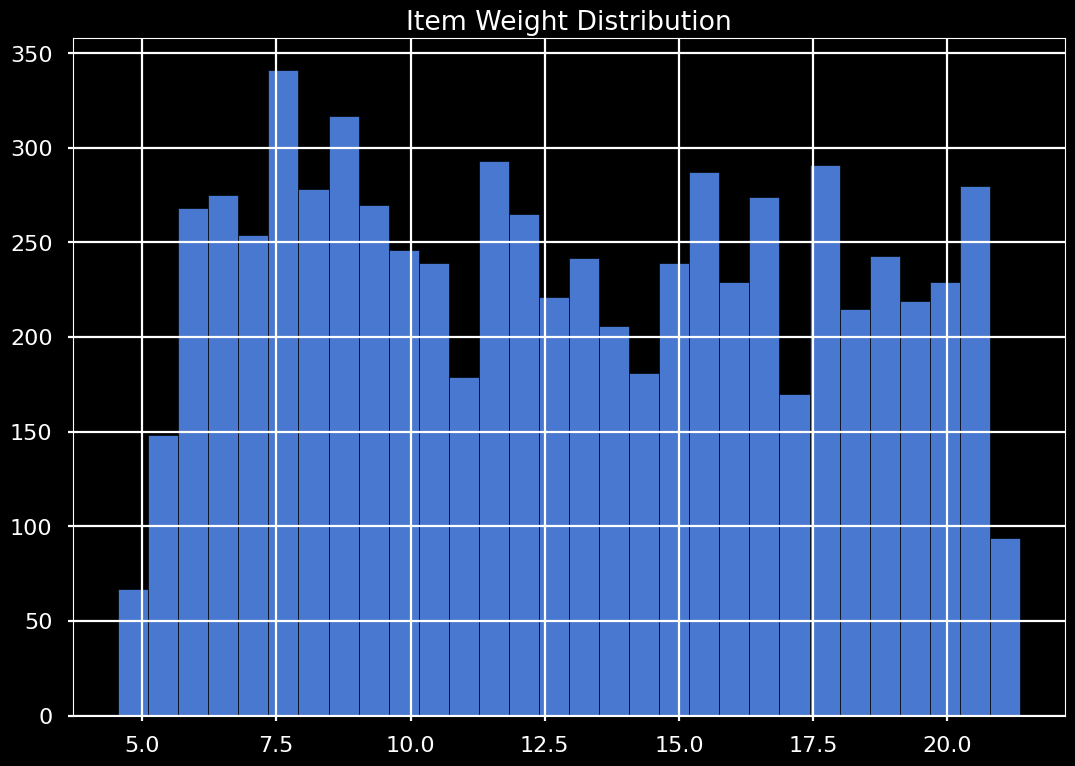

In [14]:
ax = df["Item_Weight"].hist(bins = 30, edgecolor = "black")
ax.set_title("Item Weight Distribution")

Based on the results of this histogram, I believe it would be best to replace any unknows in Item_Weight with the mean value. This is because the distribution of Item_Weight doesn't skew too far to the left or right.

In [15]:
i_mean = np.mean(df["Item_Weight"])
# replacing missing values with Item_Weight average
df['Item_Weight'].fillna(value = i_mean, inplace = True)
# filling in missing data in the Outlet_Size solumn
df['Outlet_Size'].fillna(value = "Unknown", inplace = True)
# double checking to see if the missing data has been filled in Outlet_Size
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

The data set no longer has any missing values. 


# Addressing Inconsistent Values

I am going to check every column taking object class data in order to make sure the values are consistent. 

In [16]:
# checking each object column's unique entries
# adding spacing for ease of reading
print(df["Item_Fat_Content"].unique())
print()
print(df["Item_Type"].unique())
print()
print(df["Outlet_Location_Type"].unique())
print()
print(df["Outlet_Type"].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

['Tier 1' 'Tier 3' 'Tier 2']

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


There appears to be several inconsistencies in the Item_Fat_Content column. I will address this by changing "LF" and "low fat" into "Low Fat." I will also change any "reg" values into "Regular."

In [17]:
# replacing LF with Low Fat
df = df.replace(to_replace="LF",
           value="Low Fat")
# replacing low fat with Low Fat
df = df.replace(to_replace="low fat",
           value="Low Fat")
# replacing reg with Regular
df = df.replace(to_replace="reg",
           value="Regular")
# checking to make sure the values of Item_Fat_Content are correct
print(df["Item_Fat_Content"].unique())

['Low Fat' 'Regular']


# Numerical Column Statistics

In this section, there will be listed the necessary statistics for numerical columns in order to find the mean, median, and mode, of each column. 

In [18]:
# stating the statistics for each numerical column
df.describe(include = "number")

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Text(0.5, 1.0, 'Numerical Column Deviation')

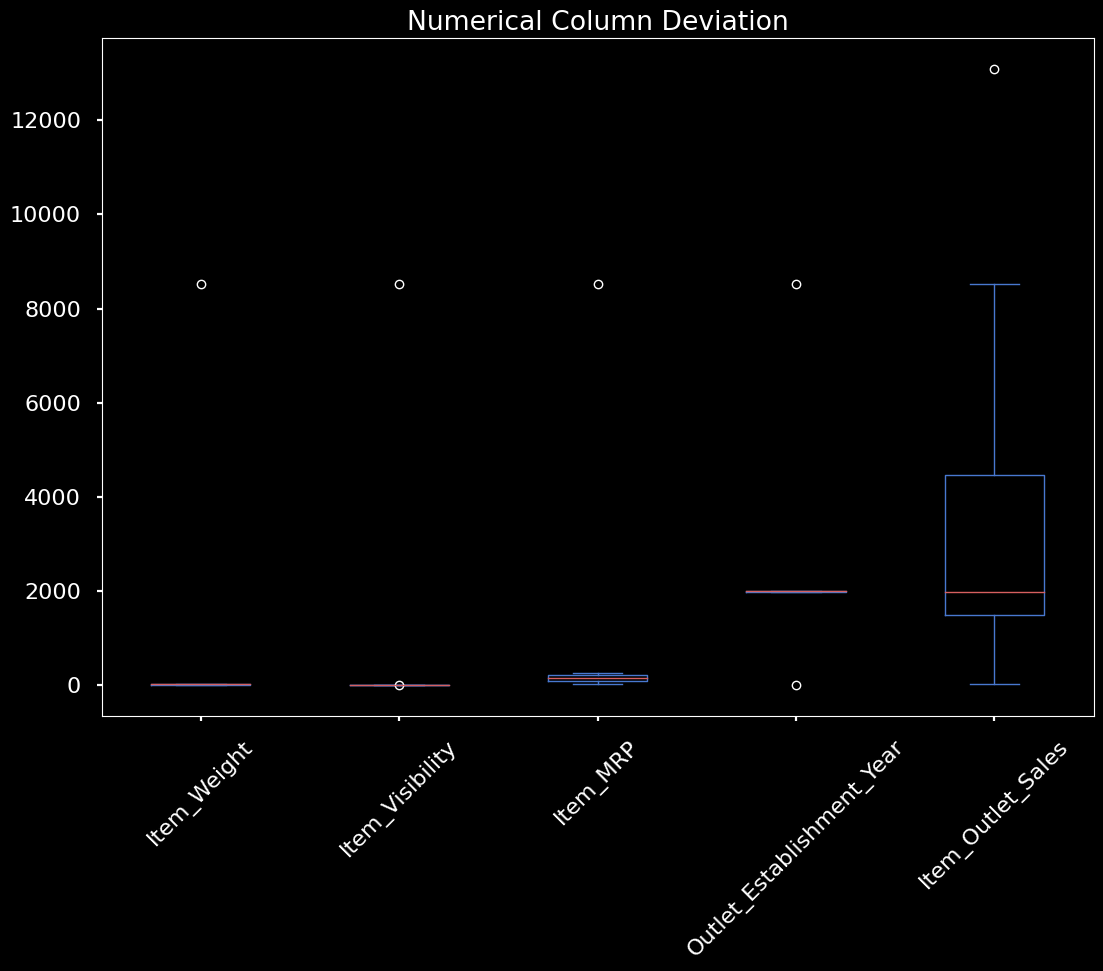

In [98]:
# setting the numerical column statistics equal to a variable
ndata = df.describe(include = "number")
# generating numerical column statistics as a bar graph
ax = ndata.plot(kind = "box")
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
# setting the graph title
ax.set_title("Numerical Column Deviation")

Based on the above graph, it can be seen that Item_Outlet_Sales can vary quite wildly at its minimum and maximum points. This will be useful information as analysis continues. 

# Exploratory Data Analysis

In this next portion, the data set will be analyzed graphically in order to search for possible correlations.

In [21]:
# checking for correlations numerically
corr = df.corr()
df.corr()

<ipython-input-21-98540b2ed3cb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
<ipython-input-21-98540b2ed3cb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


Text(0.5, 1.0, 'Numerical Data Correlations')

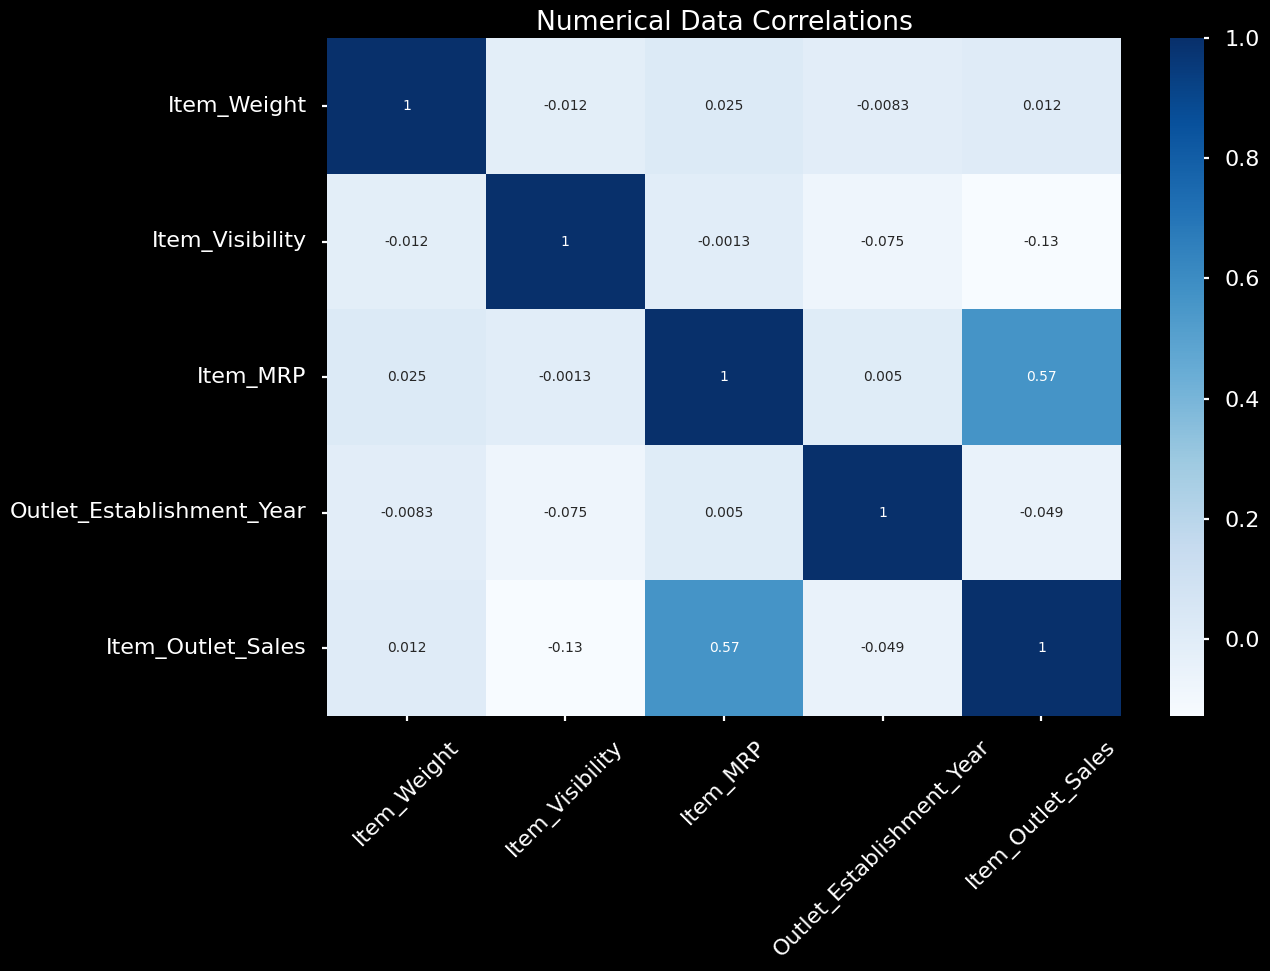

In [99]:
# generating a heatmap of all numerical column data correlations
ax = sns.heatmap(corr, cmap = "Blues", annot = True)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.set_title("Numerical Data Correlations")

There seems to be a moderate correlation between Item_MRP and Outlet_Sales. There even seems to be an ever so slight negative correlation between Item_Visibility and Item_Outlet_Sales, which I find somewhat surprising upon first glance. Though, this could be due to larger items having greater prices and more inconvenience involved in moving large items. However, this is purely speculation. The negative correlation is already so small that it can hardly be considered meaningful. 

Next, I will take a look at some of the object data columns in order to check for any patterns, which can be analyzed further during the exploratory data analysis. 

In [25]:
# checking object data type columns in order to see what should be inspected
df.describe(include = "object")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,2,16,10,4,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5517,1232,935,2793,3350,5577


Text(0.5, 1.0, 'Item Fat Content')

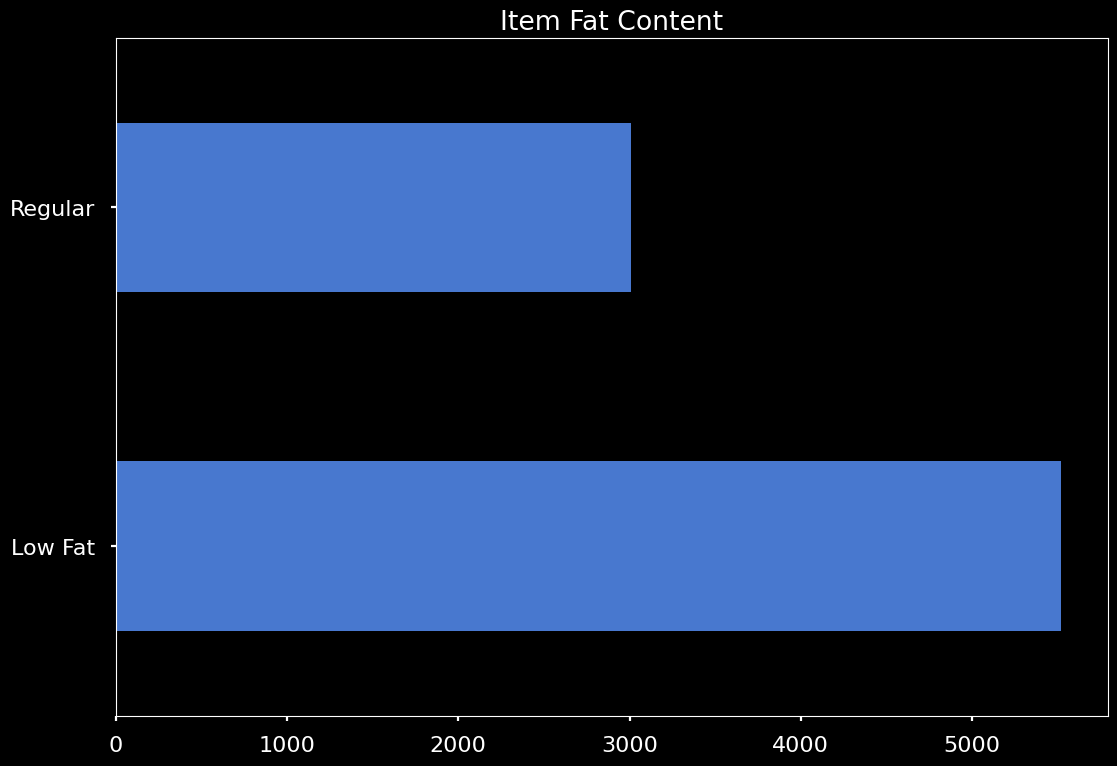

In [27]:
# generating bar graph of Item_Fat_Content value counts
ax = df["Item_Fat_Content"].value_counts().plot(kind = "barh")
ax.set_title("Item Fat Content")

The majority of items are low fat.

Text(0.5, 1.0, 'Item Type')

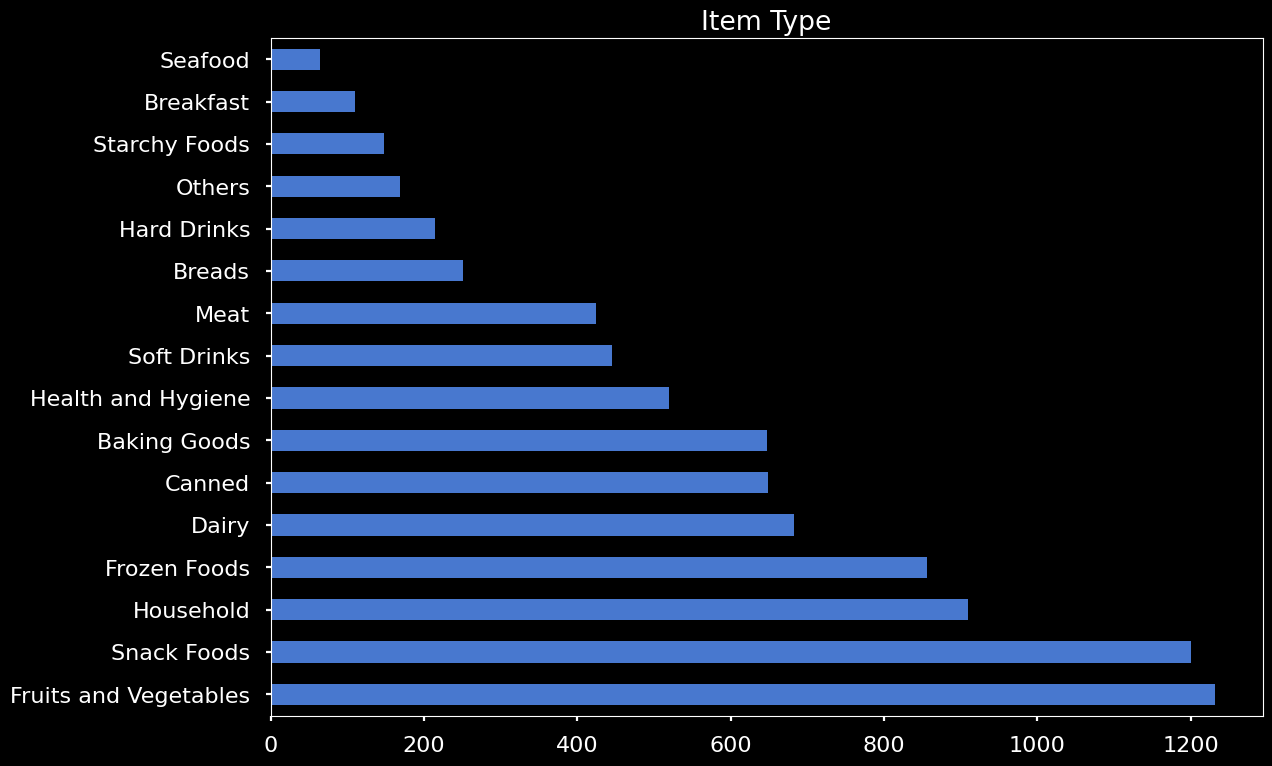

In [28]:
# generating bar graph of Item_Type
ax = df["Item_Type"].value_counts().plot(kind = "barh")
ax.set_title("Item Type")

Fruits and Vegetables represent the largest category while Seafood represents the smallest category. 

Text(0.5, 1.0, 'Outlet Location Type')

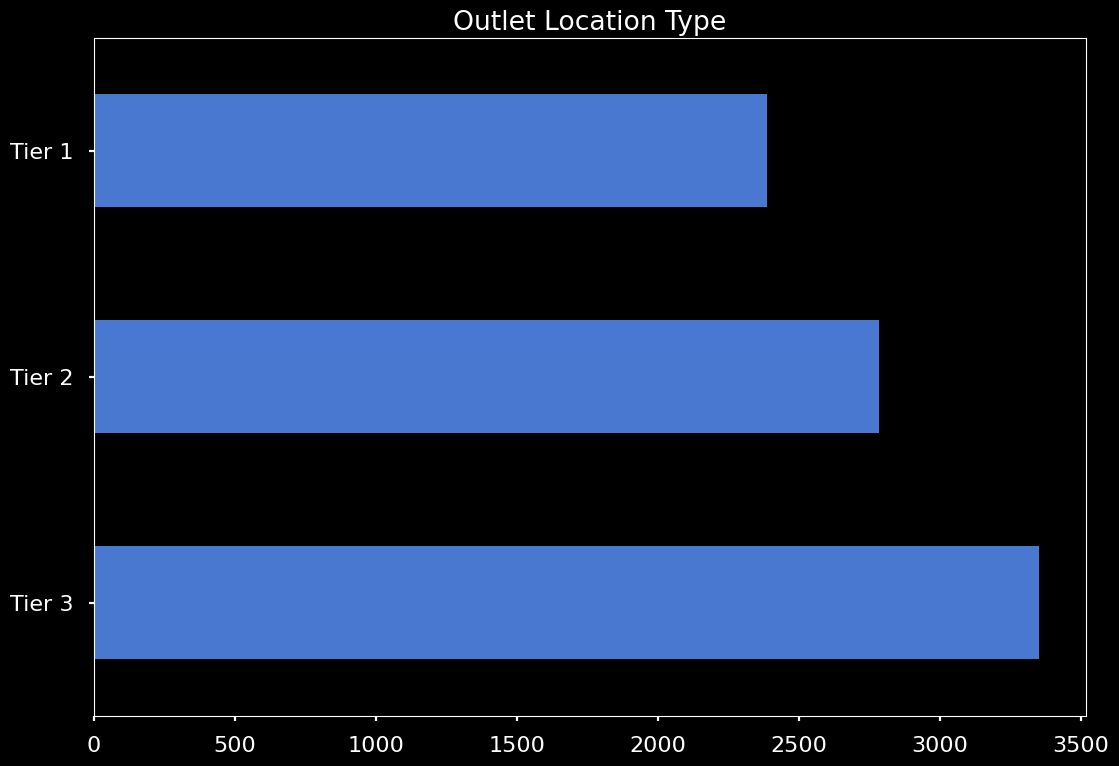

In [29]:
# generating a bar graph of outlet location types
ax = df["Outlet_Location_Type"].value_counts().plot(kind = "barh")
ax.set_title("Outlet Location Type")

Text(0.5, 1.0, 'Outlet Type')

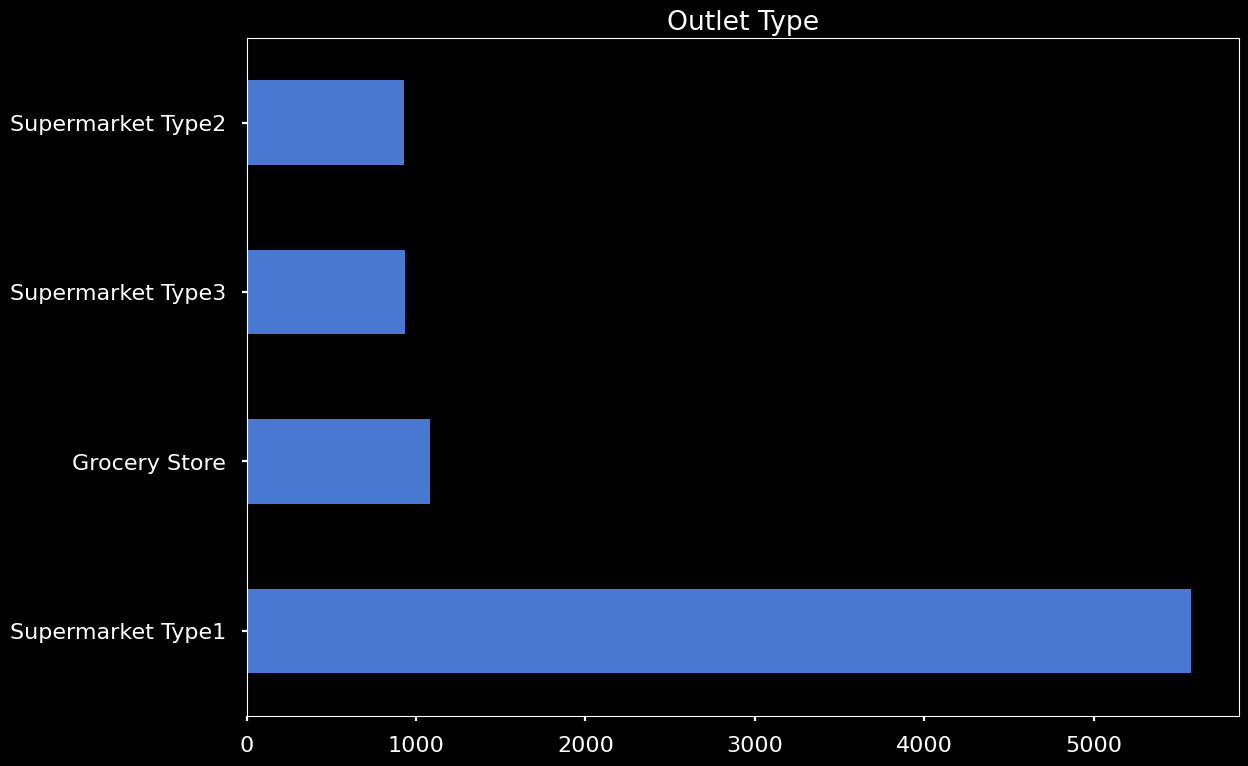

In [30]:
# generating a bar graph of outlet types
ax = df["Outlet_Type"].value_counts().plot(kind = "barh")
ax.set_title("Outlet Type")

Supermarket Type 1 is by far the most common outlet type.

Text(0.5, 1.0, 'Outlet Size')

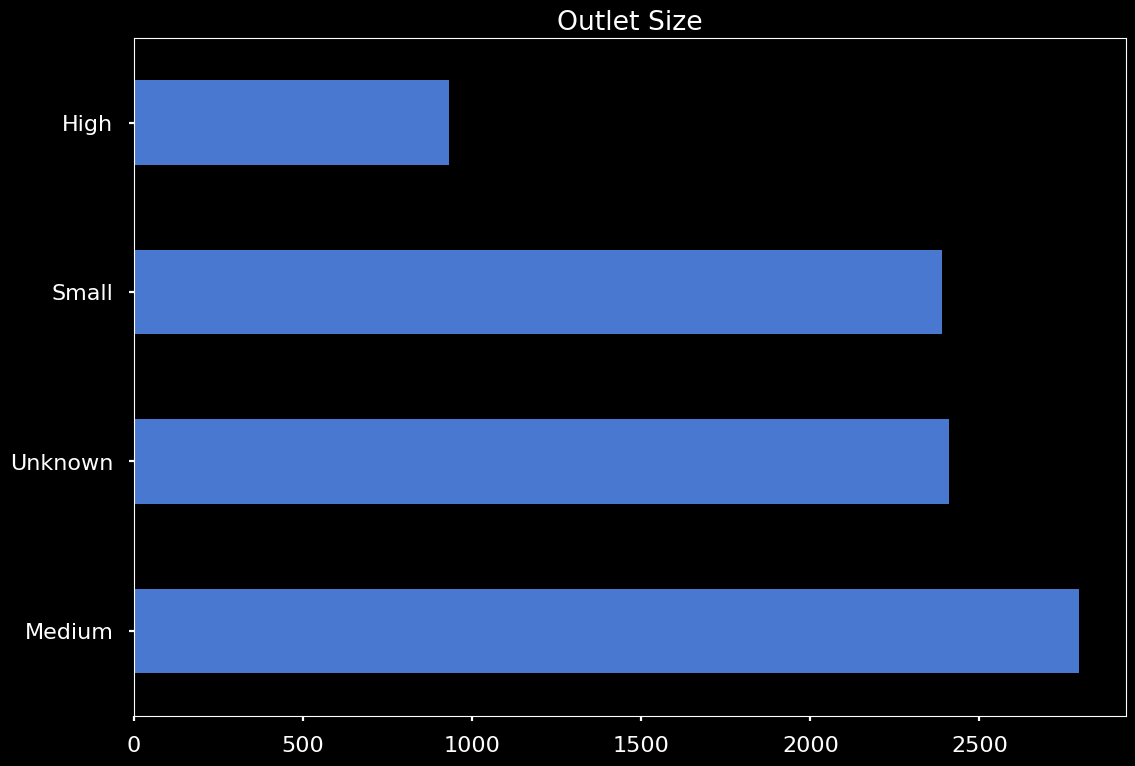

In [44]:
# generating a bar graph of Outlet_Size
ax = df["Outlet_Size"].value_counts().plot(kind = "barh")
ax.set_title("Outlet Size")

# Explanatory Data Analysis

One of the first areas of exploration will be the relationship between an item's fat content and outlet sales.

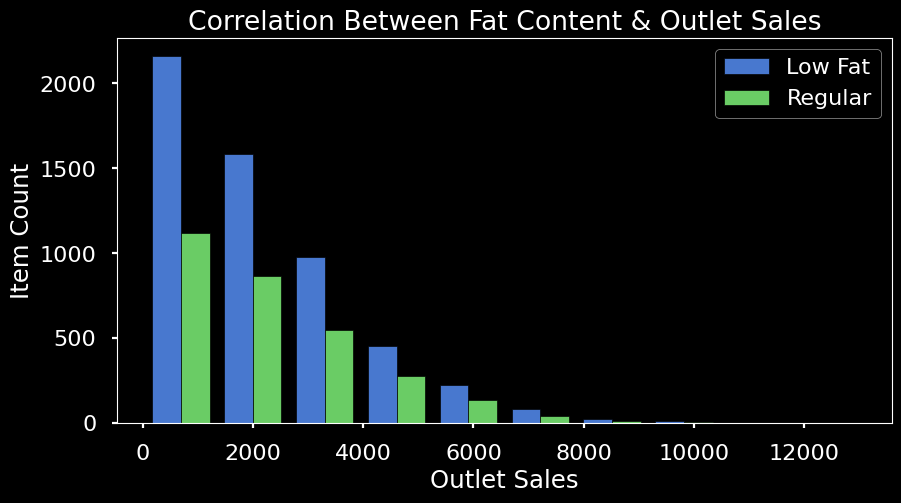

In [118]:
import matplotlib.patches as mpatches

# establishing fat content data frames
df_fat = df["Item_Fat_Content"] == "Low Fat"
df_reg = df["Item_Fat_Content"] == "Regular"

# gaining the outlet sales rates based on item fat content
rate_fat = df[df_fat]["Item_Outlet_Sales"]
rate_reg = df[df_reg]["Item_Outlet_Sales"]

# generating a histogram with both data frames plotted 
fig, ax = plt.subplots(figsize=(10,5))
plt.hist([rate_fat, rate_reg], bins = 10, edgecolor = "black")
ax.set_title("Correlation Between Fat Content & Outlet Sales")
ax.set_xlabel("Outlet Sales")
ax.set_ylabel("Item Count")

#generating a legend for the graph
ax.legend(labels = ["Low Fat", "Regular"])

plt.show()

Based on this graph, it is apparent that there are more low fat items than regular items in general. However, it seems that regular items have a tendancy to have higher outlet sales.Though, this looks to be only a slight difference. 

Next, we will take a look at the distribution of Item_Visibility. As a reminder, the Item_Visibility column represents the percentage of display space taken up within the store.

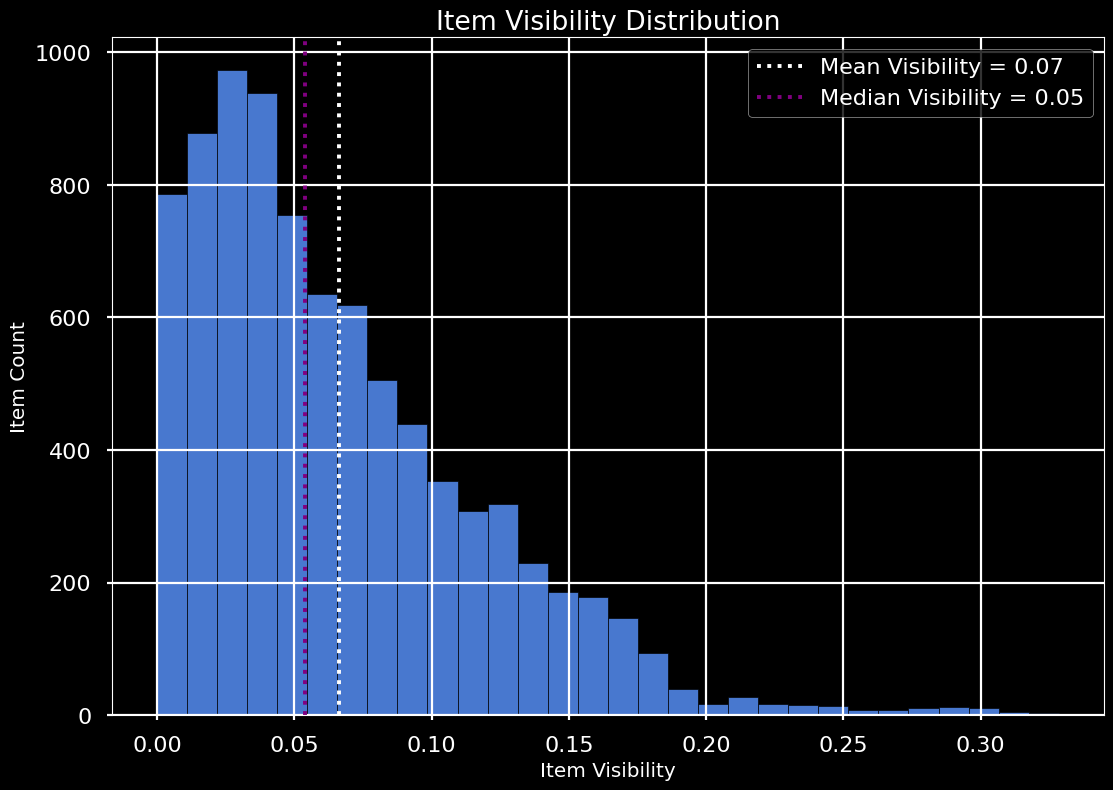

In [138]:
# generating a histogram of Item_Visibility
ax = df["Item_Visibility"].hist(bins = 30, edgecolor = "black")
ax.set_title("Item Visibility Distribution")
ax.set_xlabel("Item Visibility")
ax.set_ylabel("Item Count")

# acquiring the mean and average in order to place them onto a legend 
mean_vis = df['Item_Visibility'].mean()
ax.axvline(mean_vis,color='white', ls=':', 
           label=f"Mean Visibility = {mean_vis:,.2f}",);

med_vis = df['Item_Visibility'].median()
ax.axvline(med_vis,color='purple', ls=':', 
           label=f"Median Visibility = {med_vis:,.2f}");


ax.set_xlabel(ax.xaxis.get_label().get_text(),
              fontsize='x-large')
ax.set_ylabel(ax.yaxis.get_label().get_text(),
              fontsize='x-large')
ax.legend();

This demonstrates that most items take up a very small percentage of allocated display space, which makes sense. Most items certainly trend below 10% of the store's total display space. 